In [1]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
%matplotlib inline
import seaborn as sns; sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

/opt/anaconda3/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
sidewalk = gpd.read_file('SeattleData/ProjectSidewalkLabelsMappedonSidewalk/ProjectSidewalkLabelsMappedonSidewalk.shp')
sidewalk.head()

,OBJECTID,COMPKEY,COMPTYPE,SEGKEY,UNITID,UNITTYPE,UNITDESC,ADDBY,ADDDTTM,ASBLT,CONDITION,CONDITION_,CURBTYPE,CURRENT_ST,CURRENT__1,FILLERTYPE,FILLERWID,INSTALL_DA,SW_WIDTH,MAINTAINED,MATL,MODBY,MODDTTM,OWNERSHIP,SIDE,SURFTYPE,BUILDERCD,MAINTBYRDW,SWINCOMPLE,MULTIPLESU,GSITYPECD,DATE_MVW_L,PRIMARYDIS,SECONDARYD,OVERRIDEYN,OVERRIDECO,SRTS_SIDEW,PRIMARYCRO,MINIMUMVAR,LAST_VERIF,COLOR,OWNERSHIP_,NATURE_OF_,MAINT_FINA,SW_CATEGOR,VARIABLEWI,MAINTENANC,SHAPE_Leng,geometry
0,2,328243,97,9308,SDW-30391,SDW,"BOREN AVE BETWEEN TERRACE ST AND JEFFERSON ST,...",SW DATA LOAD,2007-09-26,None,FAIR,2017-06-30,410A,INSVC,2010-07-31,AC,18,None,96,None,None,SIDEWALK COLLECTOR,2018-02-07,None,SW,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,0.4,0,2017-06-30,None,None,None,None,BLOCK,N,SSRP_C4_SWShim,259.229841,"LINESTRING (-122.32138 47.60504, -122.32193 47..."
1,3,328244,97,9308,SDW-43317,SDW,"BOREN AVE BETWEEN TERRACE ST AND JEFFERSON ST,...",SW DATA LOAD,2007-09-26,None,GOOD,2017-06-30,410A,INSVC,2010-07-31,LSCP,30,None,72,None,None,SIDEWALK COLLECTOR,2018-02-07,None,NE,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,2.4,0,2017-06-30,None,None,None,None,BLOCK,N,SSRP_C4_SWShim,259.229392,"LINESTRING (-122.32115 47.60513, -122.32170 47..."
2,4,328245,97,9307,SDW-30392,SDW,"BOREN AVE BETWEEN BROADWAY AND TERRACE ST, SW ...",SW DATA LOAD,2007-09-26,None,GOOD,2017-06-30,410C,INSVC,2010-07-31,LSCP,18,None,96,None,None,SIDEWALK COLLECTOR,2018-02-07,None,SW,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,2.1,0,2017-06-30,None,None,None,None,BLOCK,N,SSRP_C4_SWShim,178.386732,"LINESTRING (-122.32087 47.60450, -122.32125 47..."
3,5,328246,97,9307,SDW-30393,SDW,"BOREN AVE BETWEEN BROADWAY AND TERRACE ST, NE ...",SW DATA LOAD,2007-09-26,None,EXCELLENT,2017-06-30,410C,INSVC,2010-07-31,LSCP,18,None,72,None,None,SR1146066,2021-08-27,PARK,NE,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,1.5,0,2017-06-30,None,2021-08-27,None,None,BLOCK,N,SSRP_C4_SWShim,121.582237,"LINESTRING (-122.32084 47.60480, -122.32110 47..."
4,6,328249,97,13246,SDW-30395,SDW,UTAH AVE S BETWEEN S DAWSON ST AND S BRANDON S...,SW DATA LOAD,2007-09-26,None,None,None,NONE,INSVC,None,NONE,0,None,0,None,None,NGOC,2017-07-26,None,E,UIMPRV,None,N,N,N,None,2022-06-17,DISTRICT2,None,N,None,2.0,0.0,0,None,None,None,None,None,None,N,None,518.804925,"LINESTRING (-122.33521 47.55570, -122.33521 47..."


In [3]:
labels = gpd.read_file('SeattleData/ProjectSidewalkData/ProjectSidewalkData_Geolabels.shp')
labels.head()

,Attribute,Label Type,Street ID,OSM Street,Neighborho,latitude,longtitude,Severity,Temporary,Agree Coun,Disagree C,Not Sure C,geometry
0,57259626,CurbRamp,22481,394459713,Portage Bay,47.643120,-122.32030,3.0,0,0,0,1,POINT (-122.32030 47.64312)
1,57259627,CurbRamp,12051,13521798,Portage Bay,47.643257,-122.32189,1.0,0,2,0,0,POINT (-122.32189 47.64326)
2,57259629,CurbRamp,12051,13521798,Portage Bay,47.643116,-122.32210,1.0,0,2,1,0,POINT (-122.32210 47.64312)
3,57259630,CurbRamp,22481,394459713,Portage Bay,47.643154,-122.32017,1.0,0,1,0,0,POINT (-122.32017 47.64315)
4,57259632,CurbRamp,6732,6456858,Portage Bay,47.651380,-122.32120,1.0,0,2,0,0,POINT (-122.32120 47.65138)


In [4]:
#Spatial join project sidewalk labels to sidewalk geometry
labels_mapped_on_sidewalk = labels.sjoin_nearest(sidewalk)
labels_mapped_on_sidewalk.head()

,Attribute,Label Type,Street ID,OSM Street,Neighborho,latitude,longtitude,Severity,Temporary,Agree Coun,Disagree C,Not Sure C,geometry,index_right,OBJECTID,COMPKEY,COMPTYPE,SEGKEY,UNITID,UNITTYPE,UNITDESC,ADDBY,ADDDTTM,ASBLT,CONDITION,CONDITION_,CURBTYPE,CURRENT_ST,CURRENT__1,FILLERTYPE,FILLERWID,INSTALL_DA,SW_WIDTH,MAINTAINED,MATL,MODBY,MODDTTM,OWNERSHIP,SIDE,SURFTYPE,BUILDERCD,MAINTBYRDW,SWINCOMPLE,MULTIPLESU,GSITYPECD,DATE_MVW_L,PRIMARYDIS,SECONDARYD,OVERRIDEYN,OVERRIDECO,SRTS_SIDEW,PRIMARYCRO,MINIMUMVAR,LAST_VERIF,COLOR,OWNERSHIP_,NATURE_OF_,MAINT_FINA,SW_CATEGOR,VARIABLEWI,MAINTENANC,SHAPE_Leng
0,57259626,CurbRamp,22481,394459713,Portage Bay,47.643120,-122.320300,3.0,0,0,0,1,POINT (-122.32030 47.64312),19267,27065,311888,97,14727,SDW-15994,SDW,E ROANOKE ST BETWEEN BROADWAY E AND 10TH W AVE...,SW DATA LOAD,2007-09-26,None,GOOD,2017-07-12,410C,INSVC,2007-09-26,LSCP,53,None,72,None,None,SR1146066,2021-08-27,PARK,S,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,2.7,0,2017-07-12,None,2021-08-27,None,None,BLOCK,N,SSRP_NE2_SWShim,169.539271
1,57259627,CurbRamp,12051,13521798,Portage Bay,47.643257,-122.321890,1.0,0,2,0,0,POINT (-122.32189 47.64326),19270,27068,311891,97,14726,SDW-15997,SDW,E ROANOKE ST BETWEEN HARVARD AVE E AND BROADWA...,SW DATA LOAD,2007-09-26,None,FAIR,2017-07-12,410C,INSVC,2007-09-26,LSCP,52,None,72,None,None,SIDEWALK COLLECTOR,2018-02-07,None,N,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,1.7,0,2017-07-12,None,None,None,None,BLOCK,N,SSRP_NE2_SWShim,278.447568
35,57259744,NoSidewalk,12051,13521798,Portage Bay,47.643270,-122.321465,3.0,0,0,0,0,POINT (-122.32146 47.64327),19270,27068,311891,97,14726,SDW-15997,SDW,E ROANOKE ST BETWEEN HARVARD AVE E AND BROADWA...,SW DATA LOAD,2007-09-26,None,FAIR,2017-07-12,410C,INSVC,2007-09-26,LSCP,52,None,72,None,None,SIDEWALK COLLECTOR,2018-02-07,None,N,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,1.7,0,2017-07-12,None,None,None,None,BLOCK,N,SSRP_NE2_SWShim,278.447568
46714,57259940,SurfaceProblem,12051,13521798,Portage Bay,47.643272,-122.321280,3.0,0,1,1,0,POINT (-122.32128 47.64327),19270,27068,311891,97,14726,SDW-15997,SDW,E ROANOKE ST BETWEEN HARVARD AVE E AND BROADWA...,SW DATA LOAD,2007-09-26,None,FAIR,2017-07-12,410C,INSVC,2007-09-26,LSCP,52,None,72,None,None,SIDEWALK COLLECTOR,2018-02-07,None,N,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,1.7,0,2017-07-12,None,None,None,None,BLOCK,N,SSRP_NE2_SWShim,278.447568
70319,57259979,SurfaceProblem,12051,13521798,Portage Bay,47.643272,-122.321540,3.0,0,0,1,1,POINT (-122.32154 47.64327),19270,27068,311891,97,14726,SDW-15997,SDW,E ROANOKE ST BETWEEN HARVARD AVE E AND BROADWA...,SW DATA LOAD,2007-09-26,None,FAIR,2017-07-12,410C,INSVC,2007-09-26,LSCP,52,None,72,None,None,SIDEWALK COLLECTOR,2018-02-07,None,N,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,1.7,0,2017-07-12,None,None,None,None,BLOCK,N,SSRP_NE2_SWShim,278.447568


In [5]:
#Select label types : 'NoSidewalk', 'SurfaceProblem', 'NoCurbRamp', 'Obstacle', 'Occlusion'
problems = labels_mapped_on_sidewalk.loc[(labels_mapped_on_sidewalk['Label Type'] == 'NoCurbRamp') |(labels_mapped_on_sidewalk['Label Type'] == 'NoSidewalk')|(labels_mapped_on_sidewalk['Label Type'] == 'SurfaceProblem') |(labels_mapped_on_sidewalk['Label Type'] == 'Obstacle') |(labels_mapped_on_sidewalk['Label Type'] == 'Occlusion') ] 
problems.head()

,Attribute,Label Type,Street ID,OSM Street,Neighborho,latitude,longtitude,Severity,Temporary,Agree Coun,Disagree C,Not Sure C,geometry,index_right,OBJECTID,COMPKEY,COMPTYPE,SEGKEY,UNITID,UNITTYPE,UNITDESC,ADDBY,ADDDTTM,ASBLT,CONDITION,CONDITION_,CURBTYPE,CURRENT_ST,CURRENT__1,FILLERTYPE,FILLERWID,INSTALL_DA,SW_WIDTH,MAINTAINED,MATL,MODBY,MODDTTM,OWNERSHIP,SIDE,SURFTYPE,BUILDERCD,MAINTBYRDW,SWINCOMPLE,MULTIPLESU,GSITYPECD,DATE_MVW_L,PRIMARYDIS,SECONDARYD,OVERRIDEYN,OVERRIDECO,SRTS_SIDEW,PRIMARYCRO,MINIMUMVAR,LAST_VERIF,COLOR,OWNERSHIP_,NATURE_OF_,MAINT_FINA,SW_CATEGOR,VARIABLEWI,MAINTENANC,SHAPE_Leng
35,57259744,NoSidewalk,12051,13521798,Portage Bay,47.643270,-122.321465,3.0,0,0,0,0,POINT (-122.32146 47.64327),19270,27068,311891,97,14726,SDW-15997,SDW,E ROANOKE ST BETWEEN HARVARD AVE E AND BROADWA...,SW DATA LOAD,2007-09-26,None,FAIR,2017-07-12,410C,INSVC,2007-09-26,LSCP,52,None,72,None,None,SIDEWALK COLLECTOR,2018-02-07,None,N,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,1.7,0,2017-07-12,None,None,None,None,BLOCK,N,SSRP_NE2_SWShim,278.447568
46714,57259940,SurfaceProblem,12051,13521798,Portage Bay,47.643272,-122.321280,3.0,0,1,1,0,POINT (-122.32128 47.64327),19270,27068,311891,97,14726,SDW-15997,SDW,E ROANOKE ST BETWEEN HARVARD AVE E AND BROADWA...,SW DATA LOAD,2007-09-26,None,FAIR,2017-07-12,410C,INSVC,2007-09-26,LSCP,52,None,72,None,None,SIDEWALK COLLECTOR,2018-02-07,None,N,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,1.7,0,2017-07-12,None,None,None,None,BLOCK,N,SSRP_NE2_SWShim,278.447568
70319,57259979,SurfaceProblem,12051,13521798,Portage Bay,47.643272,-122.321540,3.0,0,0,1,1,POINT (-122.32154 47.64327),19270,27068,311891,97,14726,SDW-15997,SDW,E ROANOKE ST BETWEEN HARVARD AVE E AND BROADWA...,SW DATA LOAD,2007-09-26,None,FAIR,2017-07-12,410C,INSVC,2007-09-26,LSCP,52,None,72,None,None,SIDEWALK COLLECTOR,2018-02-07,None,N,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,1.7,0,2017-07-12,None,None,None,None,BLOCK,N,SSRP_NE2_SWShim,278.447568
70352,57260095,NoCurbRamp,23988,428224938,Portage Bay,47.643270,-122.320960,3.0,0,1,0,0,POINT (-122.32096 47.64327),19270,27068,311891,97,14726,SDW-15997,SDW,E ROANOKE ST BETWEEN HARVARD AVE E AND BROADWA...,SW DATA LOAD,2007-09-26,None,FAIR,2017-07-12,410C,INSVC,2007-09-26,LSCP,52,None,72,None,None,SIDEWALK COLLECTOR,2018-02-07,None,N,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,1.7,0,2017-07-12,None,None,None,None,BLOCK,N,SSRP_NE2_SWShim,278.447568
46752,57260091,NoCurbRamp,23959,428222729,Portage Bay,47.643147,-122.322120,3.0,0,2,0,0,POINT (-122.32212 47.64315),19271,27069,311892,97,14725,SDW-15998,SDW,E ROANOKE ST BETWEEN BOYLSTON AVE E AND HARVAR...,SW DATA LOAD,2007-09-26,None,EXCELLENT,2017-07-18,NONE,INSVC,2010-07-31,NONE,0,None,94,None,None,SIDEWALK COLLECTOR,2018-02-07,None,S,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,DISTRICT4,N,None,3.0,2.0,0,2017-07-18,None,None,None,None,BLOCK,N,SSRP_NW3_SWShim,299.397841


In [6]:
#Cleaning data
problems = problems.loc[problems['Disagree C'] == 0] #Takeout ones with disagreecounts
problems = problems.dropna(subset=['Severity']) #Takeout Severity NA datas
problems = problems.rename(columns={'Severity': 'WeightedCount'})

In [7]:
#Group label data by street ID
problems_grouped = problems.groupby(by=["OBJECTID"]).sum()
problems_grouped.head()

,Attribute,Street ID,OSM Street,latitude,longtitude,WeightedCount,Temporary,Agree Coun,Disagree C,Not Sure C,index_right,COMPKEY,COMPTYPE,SEGKEY,FILLERWID,SW_WIDTH,SRTS_SIDEW,PRIMARYCRO,MINIMUMVAR,SHAPE_Leng
OBJECTID,,,,,,,,,,,,,,,,,,,,
6,883499146,50386,95937372,713.323022,-1835.028181,60.0,0,2,0,0,60,4923735,1455,198690,0,0,30.0,0.0,0,7782.073870
7,765698747,56330,445803344,618.215090,-1590.360078,52.0,0,0,0,0,65,4267250,1261,172198,0,0,26.0,0.0,0,6744.464020
30,883498865,52677,95969937,713.349166,-1835.030260,60.0,0,2,0,0,90,4923765,1455,198675,0,0,30.0,0.0,0,9034.932710
31,942397415,64943,464963489,760.904081,-1957.367978,64.0,0,0,0,0,112,5252032,1552,211920,0,0,32.0,0.0,0,9637.261203
32,176741399,42519,158520153,142.648871,-367.004220,14.0,0,7,0,0,24,984762,291,43209,0,216,9.0,6.6,57,1328.590571


In [8]:
#Merge back to sidewalk geometry
sidewalk_w_labels = sidewalk.merge(problems_grouped, how='outer', on='OBJECTID').fillna(0)
sidewalk_w_labels.head()

,OBJECTID,COMPKEY_x,COMPTYPE_x,SEGKEY_x,UNITID,UNITTYPE,UNITDESC,ADDBY,ADDDTTM,ASBLT,CONDITION,CONDITION_,CURBTYPE,CURRENT_ST,CURRENT__1,FILLERTYPE,FILLERWID_x,INSTALL_DA,SW_WIDTH_x,MAINTAINED,MATL,MODBY,MODDTTM,OWNERSHIP,SIDE,SURFTYPE,BUILDERCD,MAINTBYRDW,SWINCOMPLE,MULTIPLESU,GSITYPECD,DATE_MVW_L,PRIMARYDIS,SECONDARYD,OVERRIDEYN,OVERRIDECO,SRTS_SIDEW_x,PRIMARYCRO_x,MINIMUMVAR_x,LAST_VERIF,COLOR,OWNERSHIP_,NATURE_OF_,MAINT_FINA,SW_CATEGOR,VARIABLEWI,MAINTENANC,SHAPE_Leng_x,geometry,Attribute,Street ID,OSM Street,latitude,longtitude,WeightedCount,Temporary,Agree Coun,Disagree C,Not Sure C,index_right,COMPKEY_y,COMPTYPE_y,SEGKEY_y,FILLERWID_y,SW_WIDTH_y,SRTS_SIDEW_y,PRIMARYCRO_y,MINIMUMVAR_y,SHAPE_Leng_y
0,2,328243,97,9308,SDW-30391,SDW,"BOREN AVE BETWEEN TERRACE ST AND JEFFERSON ST,...",SW DATA LOAD,2007-09-26,0,FAIR,2017-06-30,410A,INSVC,2010-07-31,AC,18,0,96,0,0,SIDEWALK COLLECTOR,2018-02-07,0,SW,PCC,0,N,N,N,0,2022-06-17,DISTRICT3,0,N,0,3.0,0.4,0,2017-06-30,0,0,0,0,BLOCK,N,SSRP_C4_SWShim,259.229841,"LINESTRING (-122.32138 47.60504, -122.32193 47...",0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
1,3,328244,97,9308,SDW-43317,SDW,"BOREN AVE BETWEEN TERRACE ST AND JEFFERSON ST,...",SW DATA LOAD,2007-09-26,0,GOOD,2017-06-30,410A,INSVC,2010-07-31,LSCP,30,0,72,0,0,SIDEWALK COLLECTOR,2018-02-07,0,NE,PCC,0,N,N,N,0,2022-06-17,DISTRICT3,0,N,0,3.0,2.4,0,2017-06-30,0,0,0,0,BLOCK,N,SSRP_C4_SWShim,259.229392,"LINESTRING (-122.32115 47.60513, -122.32170 47...",0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
2,4,328245,97,9307,SDW-30392,SDW,"BOREN AVE BETWEEN BROADWAY AND TERRACE ST, SW ...",SW DATA LOAD,2007-09-26,0,GOOD,2017-06-30,410C,INSVC,2010-07-31,LSCP,18,0,96,0,0,SIDEWALK COLLECTOR,2018-02-07,0,SW,PCC,0,N,N,N,0,2022-06-17,DISTRICT3,0,N,0,3.0,2.1,0,2017-06-30,0,0,0,0,BLOCK,N,SSRP_C4_SWShim,178.386732,"LINESTRING (-122.32087 47.60450, -122.32125 47...",0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
3,5,328246,97,9307,SDW-30393,SDW,"BOREN AVE BETWEEN BROADWAY AND TERRACE ST, NE ...",SW DATA LOAD,2007-09-26,0,EXCELLENT,2017-06-30,410C,INSVC,2010-07-31,LSCP,18,0,72,0,0,SR1146066,2021-08-27,PARK,NE,PCC,0,N,N,N,0,2022-06-17,DISTRICT3,0,N,0,3.0,1.5,0,2017-06-30,0,2021-08-27,0,0,BLOCK,N,SSRP_C4_SWShim,121.582237,"LINESTRING (-122.32084 47.60480, -122.32110 47...",0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
4,6,328249,97,13246,SDW-30395,SDW,UTAH AVE S BETWEEN S DAWSON ST AND S BRANDON S...,SW DATA LOAD,2007-09-26,0,0,0,NONE,INSVC,0,NONE,0,0,0,0,0,NGOC,2017-07-26,0,E,UIMPRV,0,N,N,N,0,2022-06-17,DISTRICT2,0,N,0,2.0,0.0,0,0,0,0,0,0,0,N,0,518.804925,"LINESTRING (-122.33521 47.55570, -122.33521 47...",883499146.0,50386.0,95937372.0,713.323022,-1835.028181,60.0,0.0,2.0,0.0,0.0,60.0,4923735.0,1455.0,198690.0,0.0,0.0,30.0,0.0,0.0,7782.07387


In [9]:
#Select only useful columns
problems_per_street = sidewalk_w_labels[['OBJECTID','CONDITION','WeightedCount','SHAPE_Leng_x','geometry']]
problems_per_street.head()

,OBJECTID,CONDITION,WeightedCount,SHAPE_Leng_x,geometry
0,2,FAIR,0.0,259.229841,"LINESTRING (-122.32138 47.60504, -122.32193 47..."
1,3,GOOD,0.0,259.229392,"LINESTRING (-122.32115 47.60513, -122.32170 47..."
2,4,GOOD,0.0,178.386732,"LINESTRING (-122.32087 47.60450, -122.32125 47..."
3,5,EXCELLENT,0.0,121.582237,"LINESTRING (-122.32084 47.60480, -122.32110 47..."
4,6,0,60.0,518.804925,"LINESTRING (-122.33521 47.55570, -122.33521 47..."


In [10]:
#Normalize problems count by street length
problems_per_street ['Problems_WeightedCount_per_feet'] = (problems_per_street ['WeightedCount']/problems_per_street ['SHAPE_Leng_x'])
problems_per_street.head()

,OBJECTID,CONDITION,WeightedCount,SHAPE_Leng_x,geometry,Problems_WeightedCount_per_feet
0,2,FAIR,0.0,259.229841,"LINESTRING (-122.32138 47.60504, -122.32193 47...",0.00000
1,3,GOOD,0.0,259.229392,"LINESTRING (-122.32115 47.60513, -122.32170 47...",0.00000
2,4,GOOD,0.0,178.386732,"LINESTRING (-122.32087 47.60450, -122.32125 47...",0.00000
3,5,EXCELLENT,0.0,121.582237,"LINESTRING (-122.32084 47.60480, -122.32110 47...",0.00000
4,6,0,60.0,518.804925,"LINESTRING (-122.33521 47.55570, -122.33521 47...",0.11565


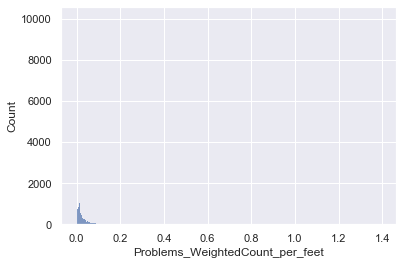

In [11]:
#Check boxplot
sns.histplot(data=problems_per_street, x="Problems_WeightedCount_per_feet")

In [12]:
#Remove outliers
q = problems_per_street["Problems_WeightedCount_per_feet"].quantile(0.99)
problems_per_street_n = problems_per_street[problems_per_street["Problems_WeightedCount_per_feet"] < q]

In [13]:
#Group to block data
bg = gpd.read_file('SeattleData/Census_Block_Groups_2010/Census_Block_Groups_2010.shp')
bg.head()

,OBJECTID,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,INTPTLAT10,INTPTLON10,TRACT,TRBG,TRBG_STR,ACRES_TOTA,ACRES_LAND,ACRES_WATE,WATER,SHAPE_Leng,SHAPE_Area,geometry
0,1,000100,1,530330001001,Block Group 1,+47.7276870,-122.2815160,100,100.1,100.1,588.283002,221.041200,367.285577,NaN,21168.918543,2.562561e+07,"POLYGON ((-122.26840 47.72641, -122.26719 47.7..."
1,2,000100,2,530330001002,Block Group 2,+47.7293165,-122.2924690,100,100.2,100.2,71.258030,71.263215,0.000000,NaN,8692.089186,3.104000e+06,"POLYGON ((-122.28970 47.73193, -122.28965 47.7..."
2,3,000100,3,530330001003,Block Group 3,+47.7228093,-122.2894558,100,100.3,100.3,91.604629,91.611355,0.000000,NaN,8560.645769,3.990298e+06,"POLYGON ((-122.28633 47.72093, -122.28629 47.7..."
3,4,000100,4,530330001004,Block Group 4,+47.7319367,-122.2944531,100,100.4,100.4,31.237245,31.239309,0.000000,NaN,4693.439609,1.360694e+06,"POLYGON ((-122.29237 47.73194, -122.29231 47.7..."
4,5,000100,5,530330001005,Block Group 5,+47.7229283,-122.2944374,100,100.5,100.5,56.956546,56.960756,0.000000,NaN,7450.759251,2.481027e+06,"POLYGON ((-122.29273 47.72019, -122.29273 47.7..."


In [14]:
sidewalk_per_bg=problems_per_street_n.sjoin(bg, op="within")
sidewalk_per_bg_grouped = sidewalk_per_bg.groupby(by=["GEOID10"]).sum()
sidewalk_per_bg_grouped.head()

,OBJECTID_left,WeightedCount,SHAPE_Leng_x,Problems_WeightedCount_per_feet,index_right,OBJECTID_right,TRACT,TRBG,ACRES_TOTA,ACRES_LAND,ACRES_WATE,WATER,SHAPE_Leng,SHAPE_Area
GEOID10,,,,,,,,,,,,,,
530330004012,181583,80.0,3746.260838,0.228603,112,120,3208,3209.6,804.424076,804.480232,0.0,0.0,74124.535544,3.504071e+07
530330004023,13072,3.0,305.668468,0.009815,18,19,402,402.3,79.738847,79.745107,0.0,0.0,7895.828165,3.473424e+06
530330004024,89209,6.0,4078.977747,0.012810,171,180,3618,3621.6,899.451527,899.515973,0.0,0.0,82928.393755,3.918011e+07
530330005002,6807,10.0,1272.567412,0.015716,42,44,1000,1000.4,199.900779,199.913690,0.0,0.0,18638.620794,8.707678e+06
530330006001,1435,0.0,721.497231,0.000000,23,24,600,600.1,222.589518,222.605871,0.0,0.0,14009.640956,9.695999e+06


In [15]:
#Normalize sidewalk problems count in each block group
sidewalk_per_bg_grouped= sidewalk_per_bg_grouped[['WeightedCount','SHAPE_Leng_x']].reset_index().rename(columns={'SHAPE_Leng_x': 'SidewalkLeng'})
sidewalk_per_bg_grouped['Problems_WeightedCount_per_mile'] = (sidewalk_per_bg_grouped['WeightedCount']/sidewalk_per_bg_grouped['SidewalkLeng'])* 5280
sidewalk_per_bg_grouped.head()

,GEOID10,WeightedCount,SidewalkLeng,Problems_WeightedCount_per_mile
0,530330004012,80.0,3746.260838,112.752427
1,530330004023,3.0,305.668468,51.820851
2,530330004024,6.0,4078.977747,7.766652
3,530330005002,10.0,1272.567412,41.490926
4,530330006001,0.0,721.497231,0.000000


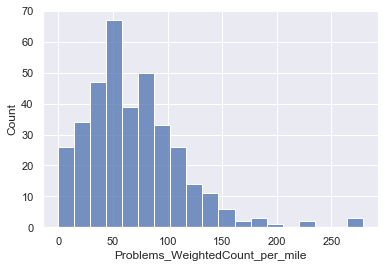

In [16]:
#Check boxplot
sns.histplot(data=sidewalk_per_bg_grouped, x="Problems_WeightedCount_per_mile")

In [17]:
sidewalk_per_bg_grouped.to_csv('SeattleData/SeattleNormalizedSidewalkLabelCounts_Problems_0720.csv',index=False)